In [4]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expand(a, b):
    d = (b - a) * 0.1
    return a - d, b + d

[-1  0  1  2  3] 聚类簇的个数为： 4
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.95686275  0.42745098  0.2627451   1.        ]
 [ 0.99607843  0.87843137  0.54509804  1.        ]
 [ 0.90196078  0.96078431  0.59607843  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0  1  2  3] 聚类簇的个数为： 4
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.95686275  0.42745098  0.2627451   1.        ]
 [ 0.99607843  0.87843137  0.54509804  1.        ]
 [ 0.90196078  0.96078431  0.59607843  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.90442138  0.3479431   0.28304498  1.        ]
 [ 0.9928489   0.71695502  0.4094579   1.        ]
 [ 0.99915417  0.97377932  0.70503652  1.        ]
 [ 0.81122645  0.92387543  0.61453287  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0] 聚类簇的个数为： 1
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.4         0.7607843

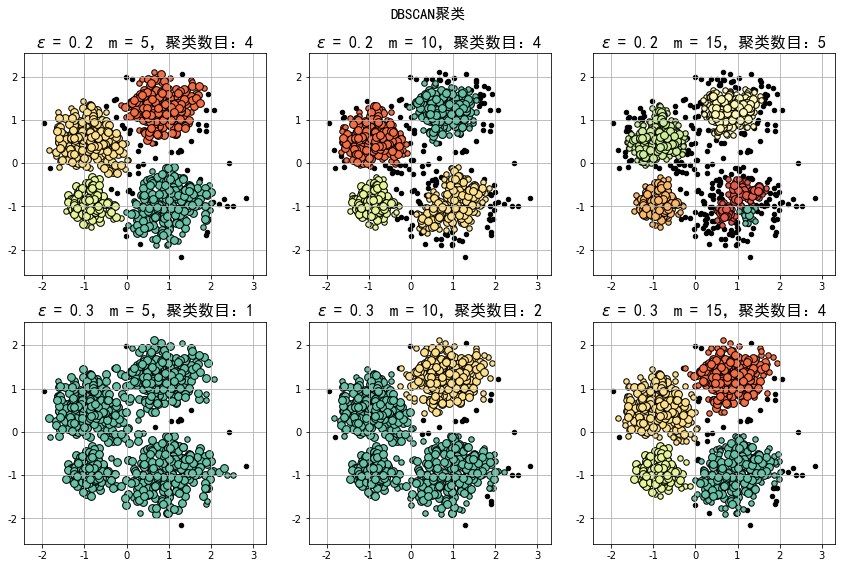

In [9]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据1的参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))


plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20, fontproperties=fontproperties)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print y_unique, '聚类簇的个数为：', n_clusters

    # clrs = []
    # for c in np.linspace(16711680, 255, y_unique.size):
    #     clrs.append('#%06x' % c)
    plt.subplot(2, 3, i + 1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    print clrs
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o',
                    edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(ur'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16, fontproperties=fontproperties)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

[0 1 2] 聚类簇的个数为： 3
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.99607843  0.87843137  0.54509804  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0  1] 聚类簇的个数为： 2
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.99607843  0.87843137  0.54509804  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0] 聚类簇的个数为： 1
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[0] 聚类簇的个数为： 1
[[ 0.61960784  0.00392157  0.25882353  1.        ]]
[-1  0] 聚类簇的个数为： 1
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]
[-1  0] 聚类簇的个数为： 1
[[ 0.61960784  0.00392157  0.25882353  1.        ]
 [ 0.4         0.76078431  0.64705882  1.        ]]


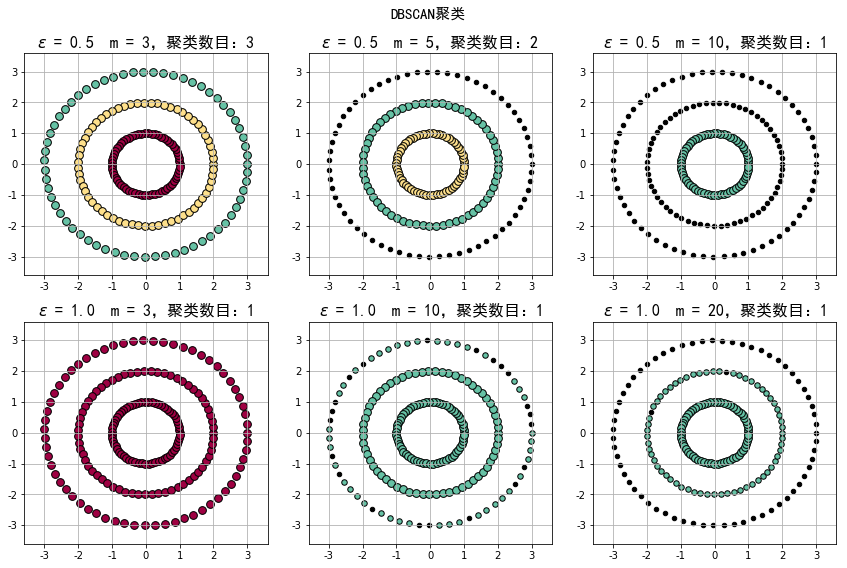

In [8]:
# 数据2
t = np.arange(0, 2*np.pi, 0.1)
data1 = np.vstack((np.cos(t), np.sin(t))).T
data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data = np.vstack((data1, data2, data3))
# # 数据2的参数：(epsilon, min_sample)
params = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))


plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20, fontproperties=fontproperties)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print y_unique, '聚类簇的个数为：', n_clusters

    # clrs = []
    # for c in np.linspace(16711680, 255, y_unique.size):
    #     clrs.append('#%06x' % c)
    plt.subplot(2, 3, i + 1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    print clrs
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o',
                    edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(ur'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16, fontproperties=fontproperties)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()